# InstaBot - Part 2

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from time import sleep
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
#opening the browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
#opening instagram
driver.get('https://www.instagram.com/')
#initializing  wait object
wait = WebDriverWait(driver, 10)

In [4]:
#  Logs in to Instagram using the provided username and password
def LogIn(username, password):
    # Find the username textbox and send the username
    username_textbox = wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    username_textbox.send_keys(username)
    # Find the password textbox and send the password
    password_textbox = wait.until(EC.presence_of_element_located((By.NAME, 'password')))
    password_textbox.send_keys(password)
    # Submit the login form
    password_textbox.submit()
    # Wait for 5 seconds
    sleep(5)
    # Handle pop-ups after login (Save login info and Turn on notifications)
    try:
        pop1 = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_ac8f')))
        pop1.click()
    except:
        pass
    try:
        pop2 = wait.until(EC.presence_of_element_located((By.XPATH, '//button[@class= "_a9-- _a9_1"]')))
        pop2.click()
    except:
        pass

In [5]:
# Opens the profile of a specific user on Instagram.
def Open_Profile(username):
    # Find and click the search element
    search = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@aria-label = "Search"]')))
    search.click()
    # Find the search box element and enter the 'username' parameter
    search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//input[@placeholder = "Search"]')))
    search_box.send_keys(username)
    # Wait for 2 seconds
    sleep(2)
    # Click on the first search result
    wait.until(EC.presence_of_element_located((By.XPATH, '//div[@role = "none"]'))).click()
    sleep(2)
    try:
        # If a search box clear button is present, click it to clear the search box
        driver.find_element(By.XPATH, '//*[@aria-label = "Clear the search box"]').click()
        search = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@aria-label = "Search"]')))
        search.click()
    except:
        # If the clear button or search element is not found, continue without clicking them
        pass
    sleep(5)

In [31]:
#update your username and password here
username = 'ramakadu0102@gmail.com'
password = 'Rama@07113'

In [32]:
#Login to your Instagram Handle
LogIn(username,password)

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.  

##### 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [8]:
#First 10 handles
first_ten_handles = ['foodtalkindia','foodconnectindia','food_lunatic','foodnetwork','food52','yourfoodlab','insiderfood','foodhallindia','dilsefoodie','foodelhi']

In [9]:
def Top_Five_Handles(username_lst):
    # Dictionary to store usernames and their corresponding number of followers
    dic = {}
    for username in username_lst:
        # Function to open the user's profile
        Open_Profile(username)
        # Extract the number of followers for the user
        num_of_followers = int(wait.until(EC.presence_of_element_located((By.XPATH, '//li[@class = "xl565be x1m39q7l x1uw6ca5 x2pgyrj"]//span[@title]'))).get_attribute('title').replace(',', ''))
        # Store the username and number of followers in the dictionary
        dic[username] = num_of_followers
    # Dictionary to store the top five handles and their number of followers
    top_five = {}
    count = 0
    # Sort the dictionary by the number of followers in descending order
    for handle in sorted(dic, key=dic.get, reverse=True):
        # Add the handle and number of followers to the top five dictionary
        top_five[handle] = dic[handle]
        count += 1
        if count >= 5:
            # Break the loop if the top five handles have been added
            break
    return top_five

In [13]:
# Get the top five handles with the highest number of followers
top_five_handles = Top_Five_Handles(first_ten_handles)
# Print each handle and its corresponding number of followers
for handle in top_five_handles:
    print(handle,'-',top_five_handles[handle])

foodnetwork - 12737777
food52 - 3625907
insiderfood - 3183294
yourfoodlab - 2709897
dilsefoodie - 1108163


##### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [14]:
def Num_of_Posts(username, day):
    # Open the user's profile
    Open_Profile(username)
    posts = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
    # Loop through the posts to find the first non-pinned post and click it
    for img in posts:
        try:
            # Check if the post is not a pinned post
            if img.find_element(By.TAG_NAME, 'title').get_attribute('innerHTML') != 'Pinned post icon':
                img.click()
                break
        except:
            # Click on the post if an exception occurs (e.g., no such element found)
            img.click()
            break
    sleep(2)
    # Counter for the number of posts
    posts_count = 0 
    while True :
        # Get the date string of the current post
        date_string = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe'))).get_attribute('datetime')[:19]
        # Convert the date string to a datetime object
        date = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S")
        # Check if the difference between the current date and the post date is greater than the specified day
        if (datetime.now() - date).days > day :
            break
        else :
            # Increment the posts count
            posts_count += 1
        # Find and Click on the next post
        next_image = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = " _aaqg _aaqh"]')))
        next_image.click()
        sleep(2)
    # Close the image viewer
    close = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "x10l6tqk x160vmok x1eu8d0j x1vjfegm"]')))
    close.click()
    return posts_count

In [15]:
# Dictionary to store the total post count for each handle
total_post_count = {}
for handle in top_five_handles :
    # Get the number of posts for each handle in the previous 3 days
    count = Num_of_Posts(handle, 3)
    # Store the handle and its corresponding post count in the dictionary
    total_post_count[handle] = count
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    # Print each handle and its corresponding post count
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodnetwork 54
food52 19
insiderfood 3
yourfoodlab 1
dilsefoodie 8


##### 3.Depict this information using a suitable graph.

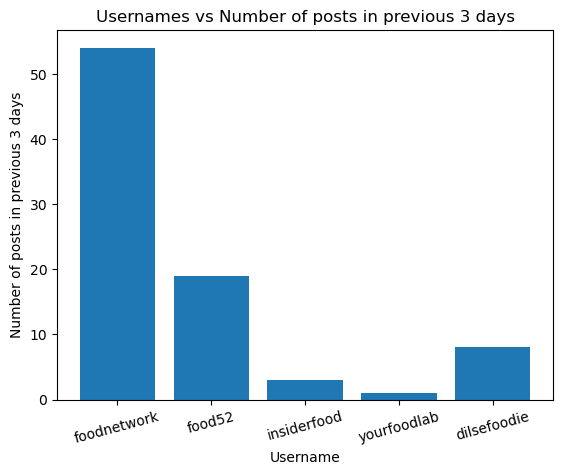

In [16]:
x = total_post_count.keys() # Get the usernames as x-axis values
y = total_post_count.values() # Get the number of posts as y-axis values

plt.bar(x,y)  # Create a bar chart with usernames and number of posts
plt.xlabel('Username') # Set the label for the x-axis
plt.ylabel('Number of posts in previous 3 days') # Set the label for the y-axis
plt.xticks(rotation = 15) # Rotate the x-axis labels for better readability
plt.title('Usernames vs Number of posts in previous 3 days') # Set the title of the chart
plt.show() # Display the chart

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  

In [17]:
def Extract_Hashtags(usernames_list):
    # List to store the extracted hashtags
    hashtag_list = []
    for username in usernames_list:
        # Open the user's profile
        Open_Profile(username)
        first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
        # Click on the first post
        first_post.click()
        sleep(2)
        for i in range(10):
            try:
                post_hashtags = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd"]')))
                for word in post_hashtags:
                    # Append each hashtag to the hashtag list
                    hashtag_list.append(word.text)
            except: # If post does not have any hastags it will pass
                pass
            
            next_image = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = " _aaqg _aaqh"]')))
            next_image.click() # Click on the next image
            sleep(1)
        close = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "x10l6tqk x160vmok x1eu8d0j x1vjfegm"]')))
        close.click() # Close the image viewer
    # Dictionary to store the count of each hashtag
    dic = {}
    for hashtag in hashtag_list:
        dic[hashtag] = dic.get(hashtag, 0) + 1 # Increment the count of each hashtag
    sorted_lists = [] # List to store the sorted hashtags and their counts
    for i in sorted(dic, key=dic.get, reverse=True):
        # Append each hashtag and its count as a sublist
        sorted_lists.append([i,dic[i]])
    return sorted_lists

In [18]:
# Get the sorted list of hashtags from the top five handles
hashtags = Extract_Hashtags(top_five_handles)
for i in hashtags:
    print(i[0],i[1]) # Print each hashtag and its corresponding count

#f52community 20
#dilsefoodie 11
#f52grams 8
#dilsecouple 6
#food 5
#StreamOnMax 3
#GiveawayAlert 3
#streetfood 3
#foodie 3
#dehradun 3
#Outchefd 2
#Food 2
#McDonalds 2
#ThumsUpBiryaniHunt 2
#Toofanicombo 2
#SwiggyVouchers 2
#yourfoodlab 2
#foodporn 2
#sanjyotkeer 2
#Watch 1
#GroceryGames 1
#pridemonth 1
#GreatFoodTruckRace 1
#BeatBobbyFlay 1
#geniusrecipe 1
#food52shop 1
#Mukbang 1
#Babydumplingg 1
#TikTok 1
#Delivery 1
#NYC 1
#DoorDash 1
#UberEats 1
#FoodTaster 1
#Pizza 1
#Cheese 1
#Careers 1
#hotdog 1
#tiktokfood 1
#cookout 1
#SLOTDOG 1
#JenniferAniston 1
#CobbSalad 1
#Salad 1
#1035 1
#MaryBerry 1
#Scones 1
#Baking 1
#BakeOff 1
#mcflurryhashbrownsanga 1
#McFlurryHashbrown 1
#TikTokTrends 1
#Guinness 1
#Foodscience 1
#cake 1
#costco 1
#costcocake 1
#Vietnam 1
#replacement 1
#goanfishcurry 1
#ad 1
#paidpartnership 1
#kutchidabeli 1
#afghanifood 1
#katlambe 1
#gedionthar 1
#nonveg 1
#bharadwaj 1
#bakery 1
#elloras 1
#pakistan 1
#dubai 1
#bunmakhan 1
#bunsamosa 1
#tea 1
#drinkanddine 1


##### Create a csv file with two columns : the word and its frequency

In [19]:
df = pd.DataFrame(hashtags, columns=['Words', 'Frequency'])
df.to_csv('Hashtags_Frequency.csv', index=False)
df.head(10)

,Words,Frequency
0,#f52community,20
1,#dilsefoodie,11
2,#f52grams,8
3,#dilsecouple,6
4,#food,5
5,#StreamOnMax,3
6,#GiveawayAlert,3
7,#streetfood,3
8,#foodie,3
9,#dehradun,3


##### Now, find the hashtags that were most popular among these bloggers

In [20]:
print(hashtags[0][0])

#f52community


##### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

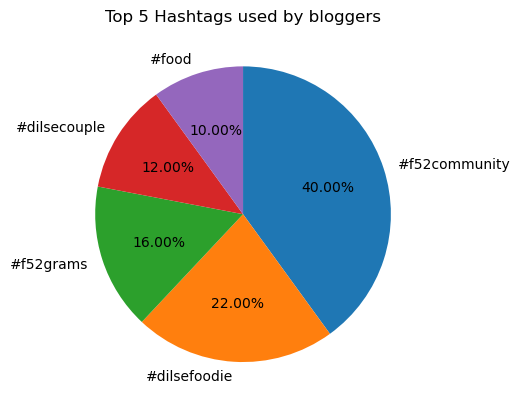

In [21]:
# Get the names of the top 5 hashtags
hashtag_name = [hashtags[0][0],hashtags[1][0],hashtags[2][0],hashtags[3][0],hashtags[4][0]]
# Get the counts of the top 5 hashtags
count = [hashtags[0][1],hashtags[1][1],hashtags[2][1],hashtags[3][1],hashtags[4][1]]
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=90)
plt.title('Top 5 Hashtags used by bloggers')
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

In [24]:
def Followers_Likes_ratio(usernames_list):
    # Dictionary to store the followers-to-likes ratio for each username
    dic = {}
    for username in usernames_list:
        # Open the user's profile
        Open_Profile(username)
        # Find Number of followers
        num_of_followers = int(wait.until(EC.presence_of_element_located((By.XPATH, '//li[@class = "xl565be x1m39q7l x1uw6ca5 x2pgyrj"]//span[@title]'))).get_attribute('title').replace(',', ''))
        # Find and Click on the first post
        first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
        first_post.click()
        sleep(2)
        # List to store the number of likes for each post
        num_of_likes = []
        count = 0
        while True:
            try:
                likes = int(wait.until(EC.presence_of_element_located((By.XPATH, '//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]'))).text.split()[0].replace(',',''))
                num_of_likes.append(likes) # Append the number of likes to the list
                count += 1
            except: # If total likes of post can only be seen by owner of the profile
                # it will pass and do not count that post
                pass
            if count >= 10: # Exit the loop after 10 posts
                break
            next_image = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = " _aaqg _aaqh"]')))
            next_image.click() # Click on the next image
            sleep(1)
        close = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "x10l6tqk x160vmok x1eu8d0j x1vjfegm"]')))
        close.click() # Close the image viewer
        avg_likes = (sum(num_of_likes) // 10) # Calculate the average number of likes
        followers_likes_ratio = num_of_followers // avg_likes # Calculate the followers-to-likes ratio
        dic[username] = followers_likes_ratio # Store the username and its corresponding ratio in the dictionary
    return dic

In [33]:
# Calculate the followers-to-likes ratio for the top five handles
follower_like_ratio = Followers_Likes_ratio(top_five_handles)
for i in follower_like_ratio:
    print(i,'-',follower_like_ratio[i]) # Print the username and its corresponding followers-to-likes ratio

foodnetwork - 5663
food52 - 236
insiderfood - 423
yourfoodlab - 106
dilsefoodie - 150


##### Create a bar graph to depict the above obtained information.

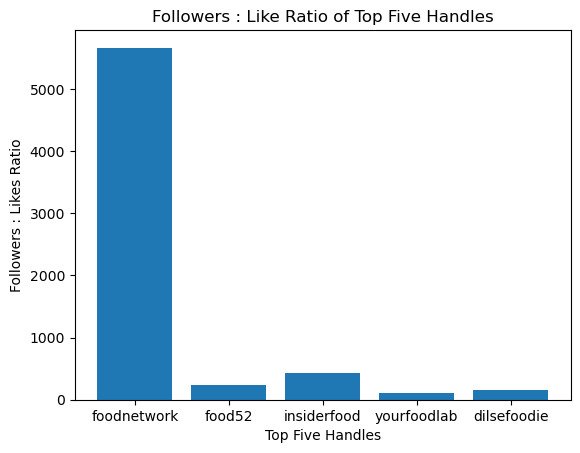

In [34]:
plt.bar(follower_like_ratio.keys(),follower_like_ratio.values())
plt.ylabel('Followers : Likes Ratio')
plt.xlabel('Top Five Handles')
plt.title('Followers : Like Ratio of Top Five Handles')
plt.show()